# 🛒 Retail Sales Forecasting

🔹 Install Prophet :

In [ ]:
!pip install prophet


🔹 Import Required Libraries :

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


🔹 Read and Clean the Data :

In [5]:
df = pd.read_csv("mock_kaggle.csv")


df['data'] = pd.to_datetime(df['data'])
df = df.sort_values('data')


df.set_index('data', inplace=True)


🔹 Feature Engineering :

In [ ]:
df_features = df.copy()


df_features['month'] = df_features.index.month
df_features['day_of_week'] = df_features.index.dayofweek
df_features['is_weekend'] = df_features['day_of_week'].isin([5, 6]).astype(int)


monthly_avg = df_features['venda'].resample('M').mean()
df_features['monthly_avg'] = df_features.index.to_period('M').map(monthly_avg)


df_features['is_holiday'] = df_features.index.strftime('%m-%d').isin(['01-01', '12-25']).astype(int)


🔹 Prepare Data for **Prophet** :

In [7]:
df_prophet = df_features[['venda']].reset_index()
df_prophet.columns = ['ds', 'y']


🔹 Train the Prophet Model :

In [ ]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model.fit(df_prophet)


🔹 Forecast Future Sales :

In [9]:
future = model.make_future_dataframe(periods=90)


forecast = model.predict(future)


🔹 Merge Actual and Forecasted Sales :

In [10]:
merged = pd.merge(
    df_prophet,
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
    on='ds',
    how='right'
)


🔹 Plot Forecast and Components :

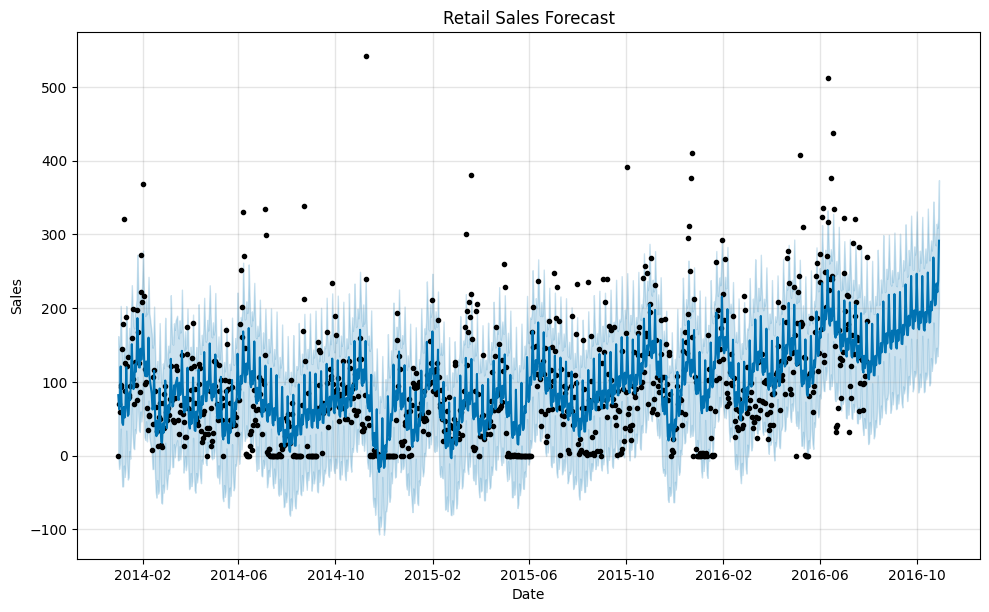

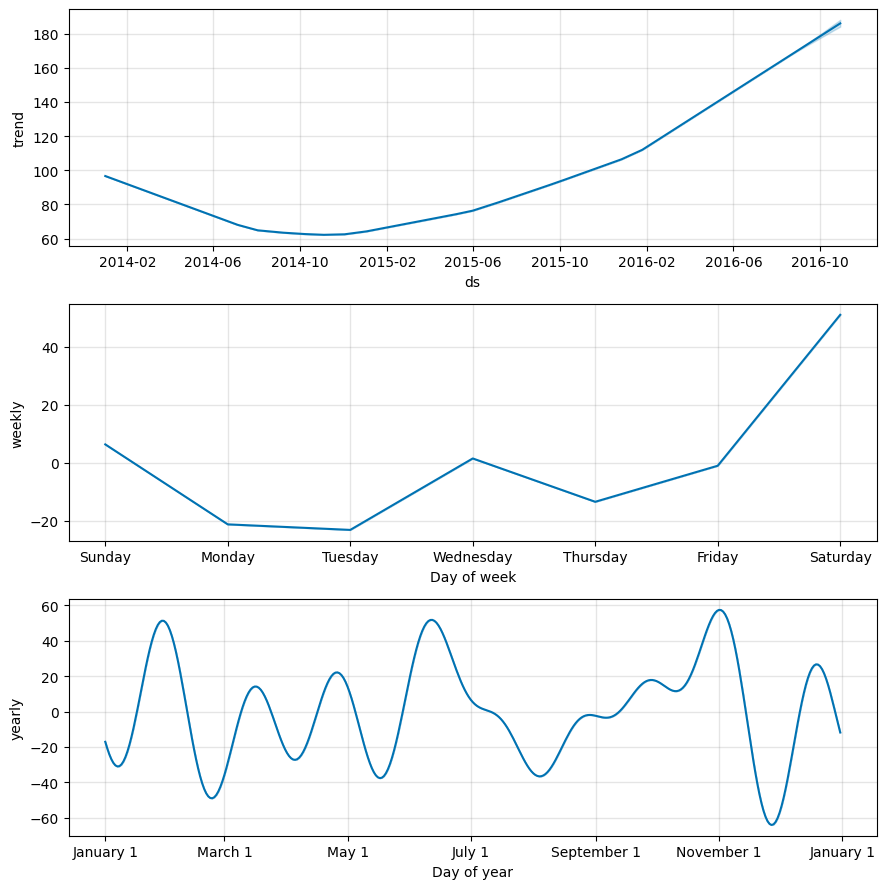

In [11]:
model.plot(forecast)
plt.title("Retail Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

model.plot_components(forecast)
plt.show()


🔹 Export Forecast to CSV :

In [ ]:
merged.to_csv("sales_actual_vs_forecast.csv", index=False)

from google.colab import files
files.download("sales_actual_vs_forecast.csv")
